In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
os.getcwd()

'C:\\Users\\dell'

In [3]:
os.chdir('C:\\Users\\dell\\Downloads')


In [4]:
df=pd.read_csv('Social_Network_Ads.csv')


In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.drop('User ID',axis=1,inplace=True)

In [7]:
df=pd.get_dummies(df,drop_first=True)

In [9]:
from sklearn.preprocessing  import StandardScaler

In [10]:
sc=StandardScaler()

In [14]:
x=df[['Age','EstimatedSalary']]
y=df['Purchased']


In [17]:
x=sc.fit_transform(x)

In [18]:
x.shape

(400, 2)

In [19]:
y.shape

(400,)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


In [22]:
acc_list=[]
err_list=[]
for i in range(1,25):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  acc=accuracy_score(y_pred,y_test)
  acc_list.append(acc)
  err_list.append(1-acc)  

In [23]:
acc_list

[0.88,
 0.9,
 0.93,
 0.92,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93]

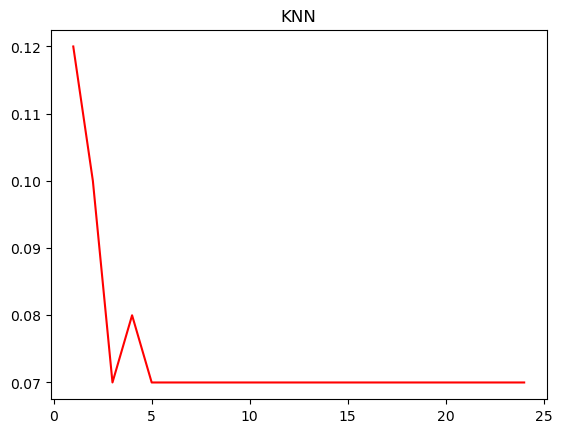

In [25]:
plt.plot(list(range(1,25)),err_list,c='r')
plt.title('KNN')
plt.show()

In [26]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_pred,y_test)


0.93

In [27]:
from sklearn.model_selection import cross_val_score




In [28]:
model=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(model,x,y,cv=20,scoring="accuracy")
print('scores',scores)
print('avg_scores',scores.mean())

scores [1.   1.   0.75 0.8  0.95 0.85 0.95 1.   1.   1.   0.85 0.8  0.9  0.75
 0.8  0.85 0.85 0.85 1.   0.9 ]
avg_scores 0.8924999999999998


In [29]:
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.9166666666666666

In [30]:
from sklearn.model_selection import StratifiedKFold

In [37]:
skf=StratifiedKFold(n_splits=5)
scores=[]
for train_index,test_index in skf.split(x,y):
  x_train,x_test=x[train_index],x[test_index]
  y_train,y_test=y[train_index],y[test_index]
  model=KNeighborsClassifier(n_neighbors=5)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  score=accuracy_score(y_pred,y_test)
  scores.append(score)
print('scores',scores)
print('avg_scores',np.array(scores).mean())

  
    

scores [0.8875, 0.9375, 0.9, 0.8, 0.9]
avg_scores 0.8850000000000001
